# Audio 
fft + logistic regression

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import wave
from matplotlib import pyplot as plt

In [2]:
import glob
import os
import random
from joblib import Parallel, delayed
from pydub import AudioSegment
from scipy.io import wavfile

C:\Users\Inna\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### Reading .wav files

In [4]:
# 1. Exploration1 - load the data and calculate the time of each sample
samplerate, data = wavfile.read('down/chunk4-98.0.wav')
times = np.arange(len(data))/float(samplerate)
print('Sample rate is', samplerate)
print(data)
type(data)
data.shape

Sample rate is 44100
[-1292 -1716 -2090 ... -3339 -2809 -2158]


(8864,)

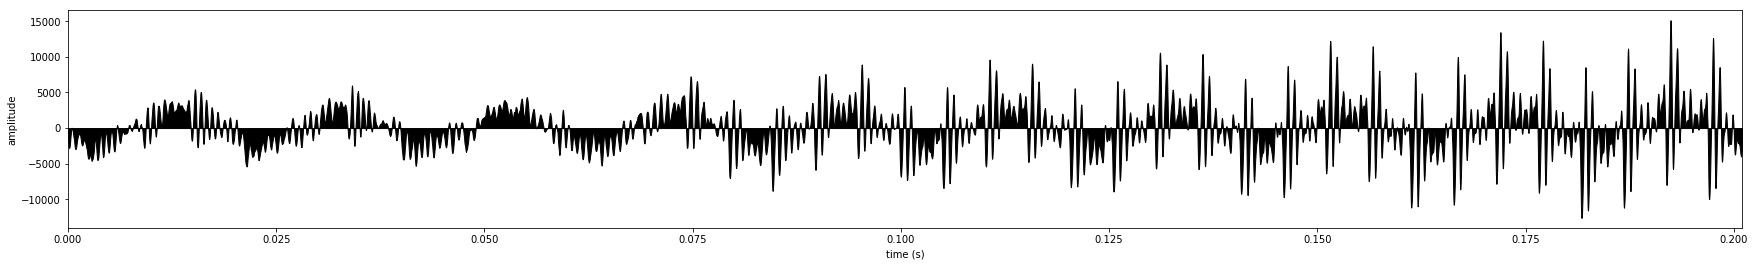

In [5]:
# 2. Exploration2 - make the plot
plt.figure(figsize=(30, 4))
plt.fill_between(times, data[:], color='k') 
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot.png', dpi=100)
plt.show()

In [6]:
# 3. Definitions
path = "down\\"
files = os.listdir(path) # -- list of all files in the folder

In [7]:
# 4. Function for calculation of the longest audio signal

def maxLen (files, path): 
    maxL = 0 
    for file in files:
        workDir = path + file
        samplerate, data = wavfile.read(workDir)
        times = np.arange(len(data))/float(samplerate)

        # maximum data length calculation
        if len(data) > maxL: maxL  = len(data)
    
    #print('maxL =', maxL)
    return maxL

In [8]:
# 5. Run the maxLen function
#maxL = maxLen(files, path)

maxL = 9000

In [9]:
# 7. Function that reads all files in the directory, pads them to the maximum length and creates matrix (array)

def AudioReadPad2Matrix (path, maxL): 
    
    dataMat = np.zeros(shape = ((len(files), maxL)))
    dataMat.shape
    count = 0 
    
    for file in files:

        workDir = path + file

        samplerate, data = wavfile.read(workDir)
        times = np.arange(len(data))/float(samplerate)
    
        # Padding the data
        dataPad = np.zeros(maxL)
        if len(data) >= 9000: 
            data = data[:8999]
            dataPad[:data.shape[0],] = data
        else: 
            dataPad[:data.shape[0],] = data
    
        dataMat[count,:dataPad.shape[0]] = dataPad

        count += 1
    
    #print('Dimensions of the data matrix:', dataMat.shape)
    return dataMat


In [10]:
# 7. Run the function 
dataMat1 = AudioReadPad2Matrix(path, maxL)

In [11]:
# 8. Creating the predicted variable
## 1 - for Up directory, -1 for down 
#dataMat1[:, (dataMat.shape[1]-1)] = -1

### First Folder

In [12]:
# 1. Definitions
path = "down\\"

print('Working directory is', path)

files = os.listdir(path) # -- list of all files in the folder
print('There are', len(files), 'files in', path ,'the directory')

#print(files)
# 5. Run the maxLen function
#maxL = maxLen(files, path)
print('The longest audio file:', maxL)

# 7. Run the function 
dataMat1 = AudioReadPad2Matrix(path, maxL)

#8. 
#dataMat1[:, (dataMat1.shape[1]-1)] = -1.0
print('dataMat dimensions are', dataMat1.shape)

print(dataMat1)

Working directory is down\
There are 3027 files in down\ the directory
The longest audio file: 9000
dataMat dimensions are (3027, 9000)
[[ 1528.  1644.  1809. ...     0.     0.     0.]
 [-2228. -3010. -3578. ...     0.     0.     0.]
 [ 3188.  3754.  4607. ...     0.     0.     0.]
 ...
 [ 3624.  3499.  3318. ...     0.     0.     0.]
 [-3891. -3225. -2546. ...     0.     0.     0.]
 [ 7649.  7852.  7666. ...     0.     0.     0.]]


In [17]:
# FFT of dataMat1
dataFFT1 = np.fft.fft(dataMat1)
dataFFT1
# Adding lables
dataFFT1[:, (dataFFT1.shape[1]-1)] = -1.0
dataFFT1

array([[ 8.85480000e+04     +0.j        ,
         2.23218871e+05  -1062.40834998j,
         3.21942451e+04 +40347.32390698j, ...,
         1.36977278e+05 +42932.82878644j,
         3.21942451e+04 -40347.32390698j,
        -1.00000000e+00     +0.j        ],
       [ 3.97720000e+04     +0.j        ,
         2.31646041e+05-167663.75802445j,
         3.53351493e+05-142216.89953108j, ...,
        -5.97867178e+05+329488.62705808j,
         3.53351493e+05+142216.89953108j,
        -1.00000000e+00     +0.j        ],
       [ 1.39685000e+05     +0.j        ,
         3.41608397e+05-134518.15219438j,
         4.65328393e+05 -59514.29260713j, ...,
        -4.42438990e+05+378818.3220044j ,
         4.65328393e+05 +59514.29260713j,
        -1.00000000e+00     +0.j        ],
       ...,
       [-2.43806000e+05     +0.j        ,
        -1.07070836e+05-208248.46678211j,
        -5.58631846e+04-274227.12917567j, ...,
        -9.43865931e+05-170215.95349945j,
        -5.58631846e+04+274227.12917567j,

### Second Folder

In [14]:
# 1. Definitions
path = "up\\"

print('Working directory is', path)

files = os.listdir(path) # -- list of all files in the folder
print('There are', len(files), 'files in', path ,'the directory')

#print(files)
# 5. Run the maxLen function
#maxL2 = maxLen(files, path)
maxL2 = 9000
print('The longest audio file:', maxL2)

dataMat2 = AudioReadPad2Matrix(path, maxL2)

#if maxL2 > maxL: 
 #   dataMat2 = AudioReadPad2Matrix(path, maxL2)  # BUG!!!
#else: 
 #   dataMat2 = AudioReadPad2Matrix(path, maxL)  

#8. 
#dataMat2[:, (dataMat2.shape[1]-1)] = 1.0
print('dataMat dimensions are', dataMat2.shape)
print(dataMat2)

Working directory is up\
There are 1383 files in up\ the directory
The longest audio file: 9000
dataMat dimensions are (1383, 9000)
[[-1958. -1916. -1927. ...     0.     0.     0.]
 [-2705. -2736. -2787. ...     0.     0.     0.]
 [  211.   261.   437. ...     0.     0.     0.]
 ...
 [ -620.  -463.  -348. ...     0.     0.     0.]
 [   65.  -617. -1124. ...     0.     0.     0.]
 [ 1534.  1334.   984. ... -2514. -3112.     0.]]


In [19]:
# FFT of dataMat2
dataFFT2 = np.fft.fft(dataMat2)
dataFFT2

# Adding lables
dataFFT2[:, (dataFFT2.shape[1]-1)] = 1.0
dataFFT2

array([[-2.83413000e+05     +0.j        ,
        -1.95263291e+05 +13162.55296873j,
        -2.80921736e+05 -14976.26130637j, ...,
         1.62106171e+05-227295.88569786j,
        -2.80921736e+05 +14976.26130637j,
         1.00000000e+00     +0.j        ],
       [-2.34025000e+05     +0.j        ,
        -1.35493300e+05 -59342.57539276j,
        -8.65356573e+04-176568.72538848j, ...,
        -3.70008315e+05-161827.47548908j,
        -8.65356573e+04+176568.72538848j,
         1.00000000e+00     +0.j        ],
       [-2.56450000e+04     +0.j        ,
         8.57234216e+04  -5734.44469461j,
         5.18878305e+03+102271.98189127j, ...,
         2.66821590e+05 +69516.55831977j,
         5.18878305e+03-102271.98189127j,
         1.00000000e+00     +0.j        ],
       ...,
       [ 1.14799000e+05     +0.j        ,
         2.86636401e+05 -50593.31253419j,
        -3.94039668e+05 -44845.96862258j, ...,
        -4.79728221e+03 -66289.48244645j,
        -3.94039668e+05 +44845.96862258j,

### Two files together

In [21]:
dataFFT = np.vstack((dataFFT1, dataFFT2))
print('Dimension are', dataFFT.shape)
print('Type of the dataMat is', type(dataFFT))
dataFFT

Dimension are (4410, 9000)
Type of the dataMat is <class 'numpy.ndarray'>


array([[ 8.85480000e+04     +0.j        ,
         2.23218871e+05  -1062.40834998j,
         3.21942451e+04 +40347.32390698j, ...,
         1.36977278e+05 +42932.82878644j,
         3.21942451e+04 -40347.32390698j,
        -1.00000000e+00     +0.j        ],
       [ 3.97720000e+04     +0.j        ,
         2.31646041e+05-167663.75802445j,
         3.53351493e+05-142216.89953108j, ...,
        -5.97867178e+05+329488.62705808j,
         3.53351493e+05+142216.89953108j,
        -1.00000000e+00     +0.j        ],
       [ 1.39685000e+05     +0.j        ,
         3.41608397e+05-134518.15219438j,
         4.65328393e+05 -59514.29260713j, ...,
        -4.42438990e+05+378818.3220044j ,
         4.65328393e+05 +59514.29260713j,
        -1.00000000e+00     +0.j        ],
       ...,
       [ 1.14799000e+05     +0.j        ,
         2.86636401e+05 -50593.31253419j,
        -3.94039668e+05 -44845.96862258j, ...,
        -4.79728221e+03 -66289.48244645j,
        -3.94039668e+05 +44845.96862258j,

In [219]:
# Plot
#plt.figure(figsize=(30, 4))
#plt.fill_between(times, dataMat[20,:], color='k') 
#plt.xlim(times[0], times[-1])
#plt.xlabel('time (s)')
#plt.ylabel('amplitude')
#plt.savefig('plot.png', dpi=100)
#plt.show()

In [24]:
dataFFT_df = pd.DataFrame(data=dataFFT[:,:])
dataFFT_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,(88548+0j),(223218.87059979868-1062.4083499840053j),(32194.245068436012+40347.323906980084j),(136977.27826719853-42932.82878643817j),(100152.24869621824-119204.478220404j),(350898.1588711706-45153.763361792284j),(279011.03558416857-181100.2685532607j),(307554.5860310361-34303.21833320844j),(720119.6575491417-45283.50395292067j),(1544580.5415510815-63569.74941311113j),...,(9491438.925905626+632917.6314659826j),(1544580.5415510815+63569.74941311113j),(720119.6575491417+45283.50395292067j),(307554.5860310361+34303.21833320844j),(279011.03558416857+181100.2685532607j),(350898.1588711706+45153.763361792284j),(100152.24869621824+119204.478220404j),(136977.27826719853+42932.82878643817j),(32194.245068436012-40347.323906980084j),(-1+0j)
1,(39772+0j),(231646.04126800058-167663.75802445217j),(353351.4925633413-142216.8995310817j),(-597867.1780470089-329488.62705807993j),(218842.6507571395+348220.8295628129j),(-12803.207243993165-160316.88119228795j),(298735.7897966088+191328.41249579313j),(230470.73716635528-251632.99539327947j),(472380.68370940397+142574.5829350947j),(1129694.7349174807-123229.15147626156j),...,(7439622.4824028835-615280.7566996459j),(1129694.7349174807+123229.15147626156j),(472380.68370940397-142574.5829350947j),(230470.73716635528+251632.99539327947j),(298735.7897966088-191328.41249579313j),(-12803.207243993165+160316.88119228795j),(218842.6507571395-348220.8295628129j),(-597867.1780470089+329488.62705807993j),(353351.4925633413+142216.8995310817j),(-1+0j)
2,(139685+0j),(341608.39653241896-134518.15219437733j),(465328.3929032428-59514.29260712507j),(-442438.99008576025-378818.3220043994j),(208545.54104684538+469168.3958003905j),(106024.84801413925-65744.98171679169j),(268036.4900447044+395208.8140996174j),(359108.1879627454-13101.688035269995j),(378267.2697691245+482934.22301464947j),(1042592.7396910645+632981.5895167481j),...,(5755321.525539493-4972529.410854569j),(1042592.7396910645-632981.5895167481j),(378267.2697691245-482934.22301464947j),(359108.1879627454+13101.688035269995j),(268036.4900447044-395208.8140996174j),(106024.84801413925+65744.98171679169j),(208545.54104684538-469168.3958003905j),(-442438.99008576025+378818.3220043994j),(465328.3929032428+59514.29260712507j),(-1+0j)
3,(2821+0j),(217799.75077386873-91110.70193214602j),(330908.41652663413+53064.9310231081j),(-479645.92973863357-457810.10220518353j),(-138578.53979165189+567619.356675283j),(-49131.36436058366+41862.80146150569j),(-170948.59921052578+543558.1741260233j),(93223.21347003979+270684.0183438125j),(-271090.39882403635+681254.8985039874j),(-5565.627679201076+1273324.4332770403j),...,(-799306.6710134149-7764697.55091687j),(-5565.627679201076-1273324.4332770403j),(-271090.39882403635-681254.8985039874j),(93223.21347003979-270684.0183438125j),(-170948.59921052578-543558.1741260233j),(-49131.36436058366-41862.80146150569j),(-138578.53979165189-567619.356675283j),(-479645.92973863357+457810.10220518353j),(330908.41652663413-53064.9310231081j),(-1+0j)
4,(-19419+0j),(206062.2368906724-71696.45271709395j),(297636.52581055363+114295.12043545538j),(-363110.8692597657-579019.6701351445j),(-360202.5906632095+486038.51971464977j),(-85197.78047091226+16059.727783868337j),(-458331.5301858172+378196.8780888952j),(-110802.68763534739+276674.6744898384j),(-688689.1545378178+327519.84123320563j),(-976518.5016613703+868915.1125551533j),...,(-6778418.182005168-4114585.545953863j),(-976518.5016613703-868915.1125551533j),(-688689.1545378178-327519.84123320563j),(-110802.68763534739-276674.6744898384j),(-458331.5301858172-378196.8780888952j),(-85197.78047091226-16059.727783868337j),(-360202.5906632095-486038.51971464977j),(-363110.8692597657+579019.6701351445j),(297636.52581055363-114295.12043545538j),(-1+0j)


### Feature Selection

In [26]:
# Test for multicollinearity, i.e., features are independent to each other
# Meaningful variable? 

1. Binary logistic regression requires the dependent variable to be binary.
2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
3. Only the meaningful variables should be included.
4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
5. The independent variables are linearly related to the log odds.
6. Logistic regression requires quite large sample sizes.

### Logistic Regression

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

Using TensorFlow backend.


In [ ]:
# Prepare you data, such as:

x_train = np.array([],[],[])  # should be a numpy array
y_train = np.array([],[],[])  # should be a numpy array
x_val = np.array([],[],[])    # should be a numpy array
y_val = np.array([],[],[])    # should be a numpy array
